# Introduction to Neural Networks

### Introduction

Why learn about neural networks?  Neural networks allow us to process information that previously was considered not interpretable by a computer.  For example, they are used to label images, summarize written text and create transcripts of audio files.  So with neural networks, we can take things that we may not previously have thought of as data, and feed it into for a computer to interpret.

In this lesson, we'll get a better sense of what neural network can do by working with one.  Then, over the next several lessons, we'll break down this magic to see how this neural network works, some of the mathematics behind it, and how it relates to the processes that occur with our own brains.

In this lesson, we'll build a neural network to classify different photos of clothing -- like a hat, a t-shirt, or a pair of pants. Let's get started

### Understanding our Data

 The easiest way to get these images is actually by using a different library called keras.

> Don't worry, we're still learning pytorch.  We'll just use keras for downloading our data, as it's a bit easier.

Let's see how easy it is to load some data with `keras`.  Simply press `shift + return` on the line of code below, and keras will download a set of images and their corresponding labels for us.

In [5]:
# !pip install tensorflow

In [6]:
import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 1us/step


So we just downloaded our fashion dataset, and assigned it's components to `X_train` `y_train`, `X_test`, `y_test`.  We'll learn about those different components later on, but for now let's focus on what we assigned to the `X_train` variable.  

The `X_train` variable points to a list of pictures.  Let's see that.  We can select the first image from our list with `X_train[0]`, and then plot it with the following:

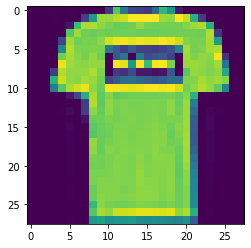

In [13]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1])

> And if you want to see the second image we can simply swap out the number `0` inside of the brackets and replace it with the number `1`, and then press `shift + return` again. 

Ok, so we saw that our first item is a picture of a very fashionable boot, and that `X_train` simply contains a lit of images.  We'll want our neural network to be able to identify each of these images, as a boot, a T-shirt and so on.

How will it do that?  Well essentially, we'll show our neural network a bunch of different images, some being boots, and some being T-shirts, or jeans, and we'll also show it the answers.  These answers are called the **labels**.  And we generally show our neural network -- or any machine learning model -- both our input data (like a picture, or an audio file) *and* then answers, so it can determine how to make it's own predictions as to what these labels are.  This is called **training** our machine learning model.  

Ok, now let's take those answers, or `labels`.  This is in the `y_train` variable.

In [10]:
y_train[:3]

array([9, 0, 0], dtype=uint8)

So `y_train` really just contains a list of numbers.  Where each number corresponds to a different item of clothing.  Here's the corresponding list.

In [11]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

So, so far it looks like everything lines up.  We saw a picture of a boot for our first image, and the first label is index 9, which corresponds to a boot.  If we look at the second or third images, we would see that they are in fact tops.

Ok, one last thing to clear up about our data.  We saw that `y_train` is just a list of numbers.  But what about `X_train`?  How do we represent a picture in Python.  Well it turns out that each item in `X_train` is a grid of numbers -- one number for each pixel in the picture.  Let's take a look. 

> Uncomment the line below (by removing the `#` symbol) and pressing `shift + return`, then hide all of those numbers by adding back in the `#` in front of our code, and pressing `shift + return`.

In [18]:
# x_train[0]

The zeros essentially represent the black space around the edge of the frame, and then we have different grayscale numbers for the pixels in the article of clothing.

> This is how all black and white pictures are represented digitally.

So far we've seen that we want to teach a neural network to identify different articles of clothing, and we'll do so by feeding into our neural network both a list of images -- each represented by a grid of numbers, and a list of corresponding numbers.  Eventually, we'll want our neural network to be able to take in a picture -- our grid of pixels -- and return the corresponding number.  

So let's do that in the next section.

### Building our Neural Network

To build our neural network, we'll use the Pytorch library.  There's no way we can understand the ins and outs of a neural network in one lesson, but we can still still see it in action.

We'll start by importing the Pytorch library, and then can build a neural network class with the following.

> Press `shift + return` on the code below.

In [66]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.W1 = nn.Linear(28*28, 64)
        self.W2 = nn.Linear(64, 64)
        self.W3 = nn.Linear(64, 64)
        self.W4 = nn.Linear(64, 10)
        
    def forward(self, X):
        A1 = torch.sigmoid(self.W1(X))
        A2 = torch.sigmoid(self.W2(A1))
        A3 = torch.sigmoid(self.W3(A2))
        Z4 = self.W4(A3)
        return F.log_softmax(Z4, dim = 1)

So above, we defined a *class* that creates neural networks.  A `class` is a programming concept.  But if you're not familiar with term, just know that in the lines above we essentially created a factory that now can produce neural networks for us.  Want to build a neural network?  We just need to run the following.

In [67]:
net = Net()
net

Net(
  (W1): Linear(in_features=784, out_features=64, bias=True)
  (W2): Linear(in_features=64, out_features=64, bias=True)
  (W3): Linear(in_features=64, out_features=64, bias=True)
  (W4): Linear(in_features=64, out_features=10, bias=True)
)

### Training the neural network

So above, we defined a neural network class and then used it to create a new neural network.  Now this neural network is fresh out of the factory, and while it has the capacity to learn how to identify images -- it hasn't undergone it's training process yet.  

If we gave fed it a picture, it would just make a wild prediction as to what that actual image was.  Let's see that wild prediction, and then later we'll see what happens we train the neural network.

> To do so, we'll need each observation to no longer be a grid but one long list.

In [68]:
first_obs = x_train[0].reshape(-1, 784)

In [69]:
first_obs.shape

(1, 784)

And then we can make a prediction with that first observation.

In [70]:
net(torch.from_numpy(first_obs).float())

tensor([[-2.2011, -2.4249, -2.3806, -2.2909, -2.5309, -1.7227, -2.5217, -2.7872,
         -2.3970, -2.1534]], grad_fn=<LogSoftmaxBackward>)

It's a little hard to interpret the above, but this is our prediction.

### Training a Neural Network

Now it's time to train our neural network.  To do so, we'll first need to initialize an optimizer and a loss function.  For the loss function, initialize cross entropy loss from the `nn` module.

In [76]:
x_loss = nn.CrossEntropyLoss()
x_loss
# CrossEntropyLoss()

CrossEntropyLoss()

In [77]:
import torch.optim as optim
adam = optim.Adam(net.parameters(), lr=0.0005)
adam

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0005
    weight_decay: 0
)

In [91]:
x_train_tensor = torch.from_numpy(x_train).float()

In [103]:
y_train_tensor = torch.tensor(y_train).reshape(-1, 1).long()

Perform the following steps.

In [106]:
for epoch in range(8):
    for (x, y) in zip(x_train_tensor, y_train_tensor):
        net.zero_grad()  
        X_reshaped = x.view(-1,28*28)
        prediction_batch = net(X_reshaped)
        loss = x_loss(prediction_batch, y) 
        loss.backward() 
        adam.step()
    print(loss)

tensor(1.0554, grad_fn=<NllLossBackward>)
tensor(0.1444, grad_fn=<NllLossBackward>)
tensor(0.7173, grad_fn=<NllLossBackward>)
tensor(0.1364, grad_fn=<NllLossBackward>)
tensor(0.0828, grad_fn=<NllLossBackward>)
tensor(2.5173, grad_fn=<NllLossBackward>)
tensor(0.1435, grad_fn=<NllLossBackward>)
tensor(0.1413, grad_fn=<NllLossBackward>)


### Evaluating our Neural Network

Now let's get a sense of how our neural network performed.  First make  predictions on the first twenty observations in the testset.

In [125]:
x_test = torch.tensor(x_test).float()

In [126]:
predictions_test = net(x_test.view(-1, 28*28).float())

In [127]:
torch.exp(predictions_test[:1])

# tensor([[4.4961e-08, 1.2412e-05, 4.5766e-09, 9.3961e-07, 1.2311e-06, 9.5997e-04,
#          4.3604e-08, 4.5264e-03, 2.0135e-05, 9.9448e-01]],
#        grad_fn=<ExpBackward>)

tensor([[1.8848e-12, 2.2202e-16, 4.5645e-16, 1.6148e-15, 1.4248e-14, 4.9672e-02,
         3.9909e-13, 7.0305e-01, 8.7145e-04, 2.4641e-01]],
       grad_fn=<ExpBackward>)

In [128]:
hard_predictions = torch.argmax(predictions_test, axis = 1)

In [129]:
hard_predictions[:10]

tensor([7, 2, 1, 1, 2, 1, 2, 2, 8, 7])

In [130]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

Looking good so far.  Next, check the accuracy of our neural network on our testset.

In [133]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, hard_predictions)

# 0.8303

0.7022

So we can see that our neural network identifies $.70$ of the data correctly.  Perhaps not perfect, but not too bad either.

### Summary

In this lesson, we trained a neural network in Pytorch.  Nice work!!

### Resources

[Colab Deeep Learning](https://colab.research.google.com/github/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb#scrollTo=d44TznbgZZgm)